                                                                                                             Nigel Mwangi


# Deep Learning and Codes

Deep learning is a specialized subset of ML that utilizes neural networks with multiple layers (deep networks). These layers automatically extract high-level features from raw data, enabling remarkable accuracy and performance in tasks previously challenging for traditional algorithms.

## Key Architectures in Deep Learning
a) Convolutional Neural Networks (CNNs): Specialized for image and spatial data processing.

b) Recurrent Neural Networks (RNNs): Designed for sequential data like time series or language.

c) Transformer Models: Power modern NLP applications like GPT and BERT.

## Requirements Before building a neural network, several prerequisites must be met:
1. Understanding of Neural Network Basics: A solid grasp of how neural networks function, including concepts such as neurons, activation functions, weights, biases, loss functions, and optimization techniques.
2. Mathematical Background: Knowledge of linear algebra (matrices and vectors), calculus (gradients and derivatives), probability, and statistics is beneficial.
3. Programming Knowledge: Proficiency in Python is highly recommended since most deep learning frameworks support Python.
4. Computational Resources: A powerful CPU or GPU is required for efficient training of deep neural networks. Cloud services such as Google Colab, AWS, or Microsoft Azure provide additional computing power.
5. Dataset Availability: A properly curated dataset is essential for training and evaluating the model.

## Building a Neural Network

 Lets build a neural network

In [1]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#getting a dataset to work with
from tensorflow import keras
keras.datasets

<module 'keras.api._v2.keras.datasets' from 'C:\\Users\\Nigel Mwangi\\anaconda3\\envs\\learn-env\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\__init__.py'>

Decided to choose imbd, which is used for binary sentiment classification (positive or negative reviews) in movies.

In [3]:
# Load the pre-processed data
imdb = keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [4]:
# Pad all sequences to the same length for consistency
maxlen = 256
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

The main reasoning for doing this,is to enable all the reviews the same length.
So that the reviews shorter than 256 words get padded with zeros at the beginning.

and

the reviews longer than 256 words get truncated to keep only the last 256 words.

### 3. Define the Model Architecture

In [5]:
# Defining the model architecture
model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=32, input_length=maxlen),  # Convert word indices to dense vectors
    keras.layers.GlobalAveragePooling1D(),  # Pooling layer to flatten the output
    keras.layers.Dense(128, activation='relu'),  # Hidden layer
    keras.layers.Dropout(0.2),  # Prevent overfitting
    keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 15s 18ms/step - loss: 0.4214 - accuracy: 0.8097 - val_loss: 0.2874 - val_accuracy: 0.8821
Epoch 2/10
782/782 [==============================] - 13s 17ms/step - loss: 0.2271 - accuracy: 0.9120 - val_loss: 0.2843 - val_accuracy: 0.8837
Epoch 3/10
782/782 [==============================] - 13s 16ms/step - loss: 0.1759 - accuracy: 0.9347 - val_loss: 0.3055 - val_accuracy: 0.8778
Epoch 4/10
782/782 [==============================] - 13s 17ms/step - loss: 0.1457 - accuracy: 0.9488 - val_loss: 0.3373 - val_accuracy: 0.8712
Epoch 5/10
782/782 [==============================] - 12s 16ms/step - loss: 0.1230 - accuracy: 0.9586 - val_loss: 0.3714 - val_accuracy: 0.8667
Epoch 6/10
782/782 [==============================] - 13s 17ms/step - loss: 0.1041 - accuracy: 0.9658 - val_loss: 0.4124 - val_accuracy: 0.8605
Epoch 7/10
782/782 [==============================] - 13s 16ms/step - loss: 0.0900 - accuracy: 0.9720 - val_loss: 0.4558 - val_accuracy:

### Evaluating model predictions

In [8]:
#Evaluate and make predictions
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Accuracy: {test_acc:.4f}')

predictions = model.predict(x_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.6107 - accuracy: 0.8449
Accuracy: 0.8449
782/782 [==============================] - 2s 2ms/step


In [9]:
#Visualize the Predictions made
print(f'Predicted sentiment (probability): {predictions[0][0]:.4f}')
print(f'Predicted label: {"Positive" if predictions[0][0] > 0.5 else "Negative"}')
print(f'Actual label: {"Positive" if y_test[0] == 1 else "Negative"}')

Predicted sentiment (probability): 0.0486
Predicted label: Negative
Actual label: Negative


Since it's text, we just show the predicted probability and label.


This demonstrates a simple yet effective neural network for digit classification. The same methodology can be extended to more complex applications such as object detection, speech recognition, and medical diagnosis.

# Tensorflow

TensorFlow is an open-source machine learning framework developed by Google Brain. It is widely used for building and training deep learning models. TensorFlow provides a flexible ecosystem of tools, libraries, and community resources that allow researchers and developers to implement state-of-the-art machine learning applications efficiently.

In [10]:
#importing libraries
import tensorflow as tf
import numpy as np

In [11]:
# Sample data: y = 3x + 2
X_train = np.array([1, 2, 3, 4, 5], dtype=np.float32)
y_train = np.array([5, 8, 11, 14, 17], dtype=np.float32)

In [12]:
# Initialize weights and bias
W = tf.Variable(0.0)
b = tf.Variable(0.0)

In [13]:
# Learning rate and optimizer
learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

In [35]:
# Training loop
# for i in range(1000):
#     with tf.GradientTape() as tape:
#         predictions = W * X_train + b
#         loss = tf.reduce_mean(tf.square(predictions - y_train)) # MSE
#         # Compute gradients and apply them
# gradients = tape.gradient(loss, [W, b])
# optimizer.apply_gradients(zip(gradients, [W, b]))

# print(f"Trained parameters: W = {W.numpy():.4f}, b = {b.numpy():.4f}")
# print(f"Prediction for x = 6: y = {W.numpy()*6 + b.numpy():.2f}")

Trained parameters: W = 0.7800, b = 0.2200
Prediction for x = 6: y = 4.90


In [14]:
# Training loop
for i in range(1000):
    with tf.GradientTape() as tape:
        predictions = W * X_train + b
        loss = tf.reduce_mean(tf.square(predictions - y_train))
    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

# Output
print(f"Trained parameters: W = {W.numpy():.4f}, b = {b.numpy():.4f}")
print(f"Prediction for x = 6: y = {W.numpy() * 6 + b.numpy():.2f}")

Trained parameters: W = 3.0102, b = 1.9633
Prediction for x = 6: y = 20.02


This example demonstrates how TensorFlow trains a simple linear regression model using gradient descent.

## Multi-Layer Perceptron (MLP)

Multi-Layer Perceptron (MLP) networks are a class of artificial neural networks that consist of multiple layers of neurons, including an input layer, one or more hidden layers, and an output layer. MLP networks use supervised learning techniques and backpropagation for training. These networks are widely used in various fields such as image recognition, speech processing, and financial forecasting.

### Basics of Neural Networks

A neural network is a computational model inspired by the structure and function of biological neural networks in the brain. It consists of layers of artificial neurons that process input data and produce outputs based on learned patterns.
Components of a Neural Network

1. Neurons: Basic processing units that receive weighted inputs, apply an activation function, and pass output to the next layer.
2. Layers:
-  Input Layer: Accepts raw data.
-  Hidden Layers: Perform feature extraction and transformation.
-  Output Layer: Produces the final prediction or classification.
3. Weights and Biases: Adjustable parameters that determine how neurons process inputs.
4. Activation Functions: Introduce non-linearity to enable learning of complex patterns.

Example: A neural network predicting house prices based on features like location, size, and number of bedrooms.

## Hands-On: Using an MLP,  Multi-Layer Perceptron (MLP) networks
## Practical Implementation


In [1]:
#importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#### Define Model

In [3]:
# Define MLP model
model = Sequential([
Flatten(input_shape=(28, 28)),
Dense(128, activation='relu'),
Dense(64, activation='relu'),
Dense(10, activation='softmax')
])

In [4]:
# Compile and train model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2438 - accuracy: 0.9292 - val_loss: 0.1332 - val_accuracy: 0.9587
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1016 - accuracy: 0.9692 - val_loss: 0.1033 - val_accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0715 - accuracy: 0.9779 - val_loss: 0.0712 - val_accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0525 - accuracy: 0.9832 - val_loss: 0.0757 - val_accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0409 - accuracy: 0.9868 - val_loss: 0.0841 - val_accuracy: 0.9748
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.0831 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0268 - accuracy: 0.9907 - val_loss: 0.0910 - val_accur

### Model Evaluation

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


313/313 [==============================] - 1s 2ms/step - loss: 0.1044 - accuracy: 0.9772
Test accuracy: 0.9772


## Convolutional Neural Networks (CNN)

Convolutional Neural Networks (CNNs) are specialized deep learning architectures designed primarily for image processing tasks. They utilize a series of convolutional layers to extract hierarchical features from images, making them highly effective for visual recognition

Working Example
Let's implement a basic CNN using TensorFlow and Keras to classify handwritten digits from the MNIST dataset:

In [6]:
#importing libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


In [7]:
#load the data 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalize
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

### Define the model

In [8]:
# Define CNN model
model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(10, activation='softmax')
])

A small description, 

1. Conv2D -  filters of size 3×3, detects patterns/features

2. MaxPooling2D - 	Downsamples to reduce size and computation

3. Conv2D -	64 filters, deeper features

4. MaxPooling2D -	Downsampling again

5. Flatten() - 	Converts 2D output into 1D

6. Dense(128) - Fully connected layer with 128 neurons
7. Dense(10, softmax)	- Output layer for 10 digit classes (0–9) with probabilities

In [9]:
# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 75s 39ms/step - loss: 0.1259 - accuracy: 0.9619 - val_loss: 0.0429 - val_accuracy: 0.9858
Epoch 2/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 0.0339 - val_accuracy: 0.9885
Epoch 3/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0283 - val_accuracy: 0.9904
Epoch 4/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.0269 - val_accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0301 - val_accuracy: 0.9908


In [10]:
# Evaluate and print accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 [==============================] - 5s 16ms/step - loss: 0.0301 - accuracy: 0.9908
Test Accuracy: 0.9908


This likely means validation accuracy = 99.08% after training. Very high performance — CNNs perform much better than basic MLPs on image tasks.

Application Areas
CNNs are widely used in:
-  Medical Imaging: Detecting anomalies in X-rays and MRIs.
- Autonomous Vehicles: Enabling real-time object recognition.
- Augmented Reality (AR): Enhancing user interactions with the environment.
- Security Systems: Facial recognition and surveillance.

## Recurrent Neural Networks (RNN)

A Recurrent Neural Network (RNN) is a class of artificial neural networks designed to recognize patterns in sequences of data, such as time series, speech, text, or video frames.

Key Concept: Unlike traditional neural networks, RNNs have loops in them, allowing information to persist. This makes them suitable for sequential data where current output depends on previous computations.

### Practical Example: Text Sentiment Classification

Problem:
Classify the sentiment (positive/negative) of a sentence using an RNN.

Dataset:
A sample dataset like the IMDB movie review dataset (each entry is a review labeled as positive or negative).

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
# Load dataset
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [13]:
# Pad sequences
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [14]:
# Define model
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

A small explanaton of the model,

- Embedding(10000, 32)- Converts each word index into a 32-dimensional vector. Input shape becomes (batch_size, 500, 32)
- SimpleRNN(32) - 	Processes the sequence of embeddings using 32 recurrent units. Outputs a single vector (last hidden state)
- Dense(1, activation='sigmoid') - 	Outputs a value between 0 and 1 — the probability that the review is positive

In [15]:
# Compile and train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 110s 275ms/step - loss: 0.5972 - accuracy: 0.6626 - val_loss: 0.4362 - val_accuracy: 0.8084
Epoch 2/5
391/391 [==============================] - 110s 281ms/step - loss: 0.4179 - accuracy: 0.8081 - val_loss: 0.4011 - val_accuracy: 0.8307
Epoch 3/5
391/391 [==============================] - 109s 278ms/step - loss: 0.2837 - accuracy: 0.8846 - val_loss: 0.4370 - val_accuracy: 0.8178
Epoch 4/5
391/391 [==============================] - 104s 266ms/step - loss: 0.2024 - accuracy: 0.9222 - val_loss: 0.4566 - val_accuracy: 0.8258
Epoch 5/5
391/391 [==============================] - 106s 270ms/step - loss: 0.0945 - accuracy: 0.9680 - val_loss: 0.5292 - val_accuracy: 0.8175


In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_acc:.4f}")


782/782 [==============================] - 30s 38ms/step - loss: 0.5292 - accuracy: 0.8175
Test Accuracy: 0.8175


This shows that the trained RNN correctly classifies 81.75% of the IMDB reviews on the test set. This is decent performance, especially for a basic SimpleRNN. 

Benefits of RNN:
- Captures context and sequence (e.g., "not good" vs "very good").
- Learns temporal dependencies that MLPs would miss.

## Long Short-Term Memory (LSTM)

LSTM is a special type of Recurrent Neural Network (RNN) capable of learning long-term dependencies. It was introduced by Hochreiter and Schmidhuber in 1997 to address the vanishing gradient problem common in standard RNNs.

Core Idea: LSTM introduces a memory cell and gates (input, forget, and output) that regulate the flow of information, allowing it to retain or forget information over long sequences.

Working Example: Sentiment Analysis with LSTM

Dataset: We'll use the IMDB movie review dataset for binary sentiment classification (positive or negative).

Hands-On practical with working with LSTM

In [17]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [18]:
# Load IMDB dataset (pre-tokenized)
vocab_size = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [19]:
# Pad sequences to have equal length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

Aan explanation on this pad sequences, 

- Ensures that all sequences are exactly 500 tokens long.

- Shorter reviews are zero-padded at the beginning.

This is required so the model receives a consistent input shape: (batch_size, 500)

In [20]:
# Define LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=maxlen))
model.add(LSTM(64)) # Main LSTM layer
model.add(Dense(1, activation='sigmoid')) # Output layer

A small explanation on the model is that,

- Embedding	- Transforms word indices into dense vectors (64-dim). Input: (batch_size, 500) → Output: (batch_size, 500, 64)
- LSTM(64) - Learns sequential patterns using 64 memory cells. Processes all 500 time steps and outputs a 64-length vector
- Dense(1, sigmoid) - Outputs a probability between 0 and 1 for binary classification

In [21]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


- Adam optimizer, shows Efficient gradient descent.
- Binary crossentropy, Appropriate for binary output.
- Accuracy, giving the Evaluation metric.

In [22]:
# Train model
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/3
391/391 [==============================] - 447s 1s/step - loss: 0.4221 - accuracy: 0.7985 - val_loss: 0.4294 - val_accuracy: 0.8319
Epoch 2/3
391/391 [==============================] - 499s 1s/step - loss: 0.2614 - accuracy: 0.8988 - val_loss: 0.3318 - val_accuracy: 0.8599
Epoch 3/3
391/391 [==============================] - 425s 1s/step - loss: 0.1988 - accuracy: 0.9260 - val_loss: 0.3373 - val_accuracy: 0.8703


#### Evaluation of what our model shows us


In [23]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


782/782 [==============================] - 119s 152ms/step - loss: 0.3373 - accuracy: 0.8703
Test Accuracy: 0.8703


The model correctly predicted the sentiment (positive or negative) for approximately 87.03% of the 25,000 reviews in the test dataset.

An accuracy above 85% using just a basic LSTM without any additional enhancements (like dropout, bidirectional layers, or pre-trained embeddings) is quite solid.

## Recursive Neural Networks (RecNNs)

Recursion is a programming concept where a function calls itself to solve a problem by breaking it down into smaller sub-problems of the same type.

Recursive Neural Networks (not to be confused with Recurrent Neural Networks) are deep learning models designed for structured input, such as trees. They apply the same set of weights recursively over a hierarchical structure (typically a tree) to extract structured representations.

How Recursive Neural Networks Work
-  Input: A parse tree or syntactic structure.
- Process: Combine leaf node embeddings into parent nodes recursively using a neural function.
- Output: A representation at the root node that summarizes the whole structure (e.g., a sentence).

Hands-On: Using a Recursive Neural Network (Simulated Example in PyTorch)

Recursive Neural Networks aren't built into high-level APIs like Keras or PyTorch out-of-the-box because they require custom tree data structures. Below is a simplified simulated example of how you might implement one manually for binary parse trees.

Example: Binary Tree Sentiment Classification

In [1]:
# installing pytorch 
!pip install torch torchvision torchaudio


     ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
     -------------------------------------- 0.0/216.1 MB 640.0 kB/s eta 0:05:38
     -------------------------------------- 0.0/216.1 MB 640.0 kB/s eta 0:05:38
     -------------------------------------- 0.0/216.1 MB 279.3 kB/s eta 0:12:54
     -------------------------------------- 0.1/216.1 MB 476.3 kB/s eta 0:07:34
     -------------------------------------- 0.1/216.1 MB 476.3 kB/s eta 0:07:34
     -------------------------------------- 0.1/216.1 MB 450.6 kB/s eta 0:08:00
     -------------------------------------- 0.2/216.1 MB 655.1 kB/s eta 0:05:30
     -------------------------------------- 0.2/216.1 MB 687.0 kB/s eta 0:05:15
     -------------------------------------- 0.3/216.1 MB 759.5 kB/s eta 0:04:45
     ---------------------------------------- 0.5/216.1 MB 1.1 MB/s eta 0:03:25
     ---------------------------------------- 0.5/216.1 MB 1.1 MB/s eta 0:03:24
     ---------------------------------------- 0

In [2]:
# importing libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
# Sample tree node class
class TreeNode:
    def __init__(self, left=None, right=None, value=None):
        self.left = left
        self.right = right
        self.value = value # Word embedding or input vector

Explanation on this is, 
- TreeNode	Represents a node in a syntax/parse tree
- value	A tensor (vector) holding word or phrase encoding
- left/right	Pointers to child nodes (for recursive traversal)
- Used in	Sentiment analysis, syntax trees, question answering

In [5]:
# Recursive Neural Network
class RecNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(RecNN, self).__init__()
        self.W = nn.Linear(2 * hidden_dim, hidden_dim)
        self.embedding = nn.Embedding(10000, input_dim)
        self.projection = nn.Linear(input_dim, hidden_dim)
        
    def forward(self, node):
        if node.left is None and node.right is None:
            # Leaf node: use embedding
            embed = self.embedding(torch.tensor([node.value]))
            return self.projection(embed).squeeze(0)
        else:
            left_vec = self.forward(node.left)
            right_vec = self.forward(node.right)
            combined = torch.cat((left_vec, right_vec), dim=-1)
            return F.relu(self.W(combined))

Also,
- self.embedding	Turns word indices into dense vectors (input_dim)
- self.projection	Projects embedding into hidden_dim space (for recursive operations)
- self.W	Composes two child vectors into a parent vector

Leaf nodes: Get embedded word vector → projected to hidden_dim

Non-leaf nodes:

- Recursively get left and right vectors
- Concatenate them: left_vec ,  right_vec]
- Apply linear layer and ReLU activation to get the parent vector

In [7]:
# Tree structure: (great (not movie))
left_leaf = TreeNode(value=2)     # "not"
right_leaf = TreeNode(value=3)    # "movie"
intermediate = TreeNode(left=left_leaf, right=right_leaf)  # (not movie)
root = TreeNode(left=TreeNode(value=1), right=intermediate)  # (great (not movie))


    root
         /    \
     "great"   node
               /   \
           "not"  "movie"

In [8]:
model = RecNN(input_dim=50, hidden_dim=64)
sentence_vector = model(root)

print("Final representation vector:", sentence_vector)

Final representation vector: tensor([0.0000, 0.0000, 0.3416, 0.2859, 0.0000, 0.4300, 0.0000, 0.0000, 0.0000,
        0.0000, 0.4691, 0.2243, 0.1359, 0.0262, 0.0000, 0.0000, 0.0000, 0.0000,
        0.3079, 0.4697, 0.1843, 0.1431, 0.0000, 0.1022, 0.0000, 0.3758, 0.0000,
        0.2991, 0.0000, 0.0847, 0.1217, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0505, 0.9173, 0.0000, 0.6391, 0.0000, 0.0000, 0.0000, 0.0000, 0.0653,
        0.5322, 0.0908, 0.1840, 0.0767, 0.0000, 0.2456, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.2046, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0981], grad_fn=<ReluBackward0>)


This runs a recursive forward pass from leaves up to the root.

The result is a 64-dimensional vector that represents the entire sentence.

Lets give a short visualization to understand what is happening,

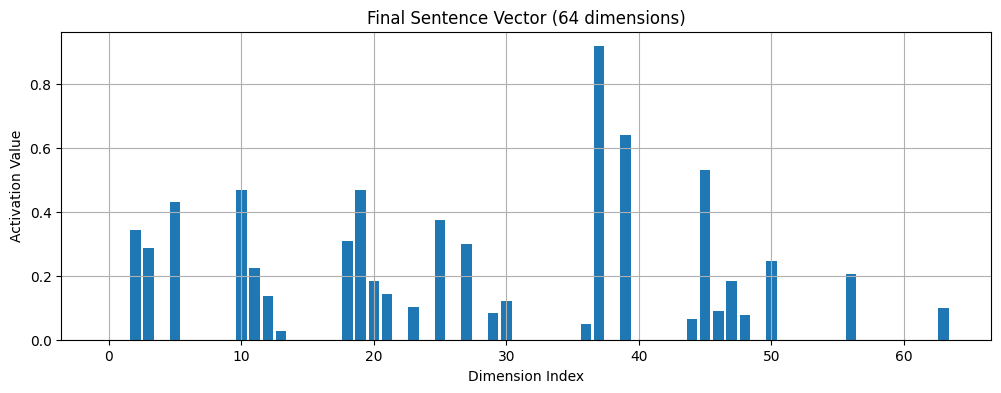

In [10]:
# Detach from computation graph and convert to numpy
vec = sentence_vector.detach().numpy()

# Plot the 64-dimensional sentence vector
plt.figure(figsize=(12, 4))
plt.bar(range(len(vec)), vec)
plt.title("Final Sentence Vector (64 dimensions)")
plt.xlabel("Dimension Index")
plt.ylabel("Activation Value")
plt.grid(True)
plt.show()


Each bar represents the value of a single neuron in the final vector output of your RecNN.

Peaks in the plot indicate strong activations, potentially tied to certain patterns in the sentence.

